# ResNet논문 톺아보기

ResNet는 shortcut connection을 가진 ResNet의 기본 블럭을 Residual Block라고 부르고 이게 여러 개 있는 구조입니다. 자세한 것은 뒤에 가서 더 이야기를 해볼겁니다.

https://arxiv.org/pdf/1512.03385.pdf

## Abstract

### Simple Summary

Residual Learning Framework를 통해서 레이어가 깊어져도 학습이 잘되게 하고, residual function은 레이어 입력값을 참조하도록 구성됩니다. 이렇게 하면 residual network가 최적화하기도 싶고 꽤 깊은 네트워크에서도 높은 정확도를 보유할 수 있습니다.

Representation은 네트워크의 layer들이 거친 결과로, 많은 layer부터 추출된 고차원은 특징일수록 양질의 정보를 가집니다

---

## Introduction

### 문제의식

서론에서 논문은 어떠한 문제를 제기하고 있는데 그것은 바로 딥러닝 모델 레이어를 깊게 쌓을 시 항상 성능이 좋아지냐입니다. 허나, 이 문제 발생 원인(Vanishing/Exploding Gradient로 인해 모델 수렴 방해)과 해결(Normalized initialization[weight initialization], Ingtermediate normalization layers[batch normalization])은 이미 전반적으로 나온 상태이기에 논문에서 주장하는 핵심 문제는 아닙니다.

여기서 주장하는 것은 레이어가 깊게 쌓인 상태에서 모델이 어느 특정 값에 수렴을 했음에도 불구하고 레이어 개수가 적은 모델의 train/tes error보다 커지는 현상으로 최적화가 잘 되지 않아 발생하는 문제인 Degradation problem에 대한 제기입니다.

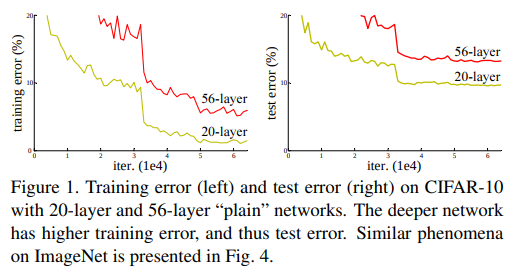  

### Residual Learning Framework

이 Framework를 이용하여 성능 저하 문제를 해결할 것이라는 겁니다. 이 방법은 쌓여진 레이어들을 underlying mapping에 직접 학습하는 것이 아니라 residual mapping맞춰 학습하는 것입니다. 이렇게 하면, original mapping(H(x)) = F(x) + x
*F(x) = 쌓여진 비선형 레이어의 mapping

### 기발한 생각

저자들은 레이어를 많이 쌓아서 모델 성능이 떨어지는 문제에 대해서 이상한 점을 느꼈습니다. 왜냐하면, 기존 모델에 identity mapping레이어를 여러 개 붙였다고 해서 모델의 성능이 떨어져서 학습이 잘 이루어지지 않는 것이기 때문입니다. 그래서 저자들은 한 가지 기발한 생각을 해서 이 상황을 해결하려고 했습니다.

*H(x)는 학습레이어, F(x)는 학습해야 할 x는 입력값

그것은, H(x) = F(x) + x로  표현하는 것입니다. 이렇게 되면, F(x)가 Vanishing Gradient현상으로 학습이 되지 않아 zero mapping가 되더라도 최종 H(x)는 x라도 남겨 되어 identity mapping가 가능해지기 되어 학습이 가능하니 성능 저하가 일어나지 않습니다. 실제로 실험을 해보니 구조적으로 안정하게 학습이 진행이되고 레이어를 깊게 쌓을 수록 성능이 향상되었습니다

*레이어 입력값:x , residual layer의 결과 F(x), 최종 출력값 :F(x)+x

### Residual Block

논문에서 위의 문제는 네트워크 학습이 잘 되지 않는 것으로 이것을 해결하기 위한 솔루션으로 래이어의 입력값을 활용하여 레이어가 residual function을 학습하게 만들기입니다. 

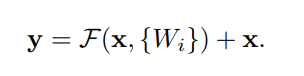

자세히 말씀을 해드리면, 지름길(shortcut connection)을 이용해서 레이어가 입력값에 직접 참조하도록 레이어를 변경했다고 생각하면됩니다(아래 그림을 첨부하니 그림을 보시면 이해가 될 것입니다.) shortcut connetction을 이용하면 입력값에서 바로 출력층으로 더합니다.

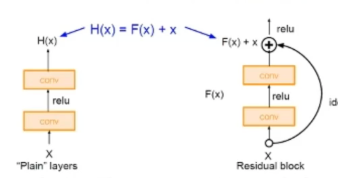

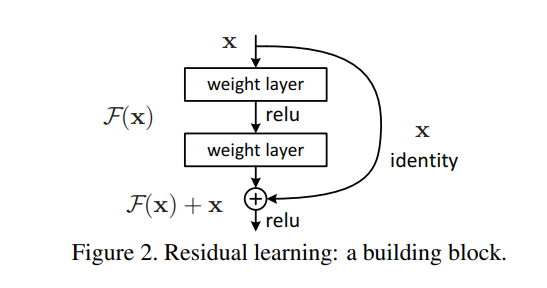


이러한 구조 덕분에 별도의 파라미터나 computational complexity가 추가되지 않아도 되어 plain 과 residual간의 비교가 공정하게 됩니다.

또한, SGD에 따른 역전파 end-to-end학습이 가능하고, solver 수정없이도 common library사용하여 구현 가능(이런 게 가능하구나 정도의 감만 익히세요)


### Experiments

1. 실험 결과 제공

1-1. ImageNet

  - plain network는 깊이가 깊어지면 training error가 높아지지만 deep residual network는 쉽게 최적화가 가능합니다.
  
  - deep residual network는 아주 깊게 깊이를 쌓을 수 있는 성능적 이득을 가짐
  
1-2. CIFAR-10 dataset

   - 특정 dataset에만 국한되지 않고 다양하게 쓰임
   
   - layer respons의 std분석
   
   - 1000개 이상의 layer로 구성된 모델 시험
   

---
이제 워밍업을 했으니 논문 속으로 들어가봅시다.

## Deep Residual Learning

### Residual Learning

성능 저하 문제 해결을 위해서, 쌓인 레이어가 H(x)-x로 mapping되어 original mapping을 F(x)+x로 변형했다. 물론 H(x)의 최적화가 identity mapping가 아닐지라도, 이 변형식은 문제에 전제조건을 제공해주는 효과가 있다. 왜냐하면, solver은 새로운 function으로 학습하는 것보다 기존에서 변형된 function으로 학습하는 것이 더 쉽기 때문이고 이는 논문의 실험결과에도 나온다.(Fig7)

### Identity Mapping by Shortcuts

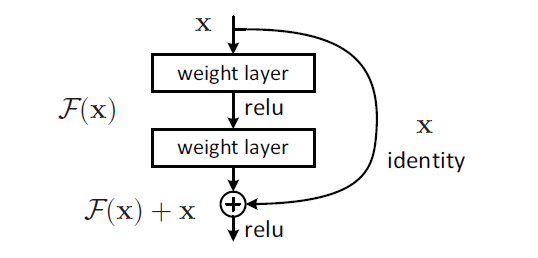

이 논문은 쌓여진 레이어당 residual learning을 사용한다.  

Building block는 y = F(x,{Wi}) + x로 정의된다

*x:input, y:output , F(x,{Wi}):학습될 residual mapping
*F +x의 연산이 가능하려면 둘의 차수가 같아야하고, linear projection Ws(square matrix)를 수행해야함.

Building block는 y = F(x, {Wi}) + Wsx로도 정의가 가능은 하지만 성능 저하 문제를 해결하기엔 indetity mapping만으로도 충분해서 Ws는 그저 dimension matching용도로만 사용이된다.

Projection은 현재 데이터를 다른 차원에서 보도록하는 것이다. FC layer상을 기준으로 예를 들겠습니다.

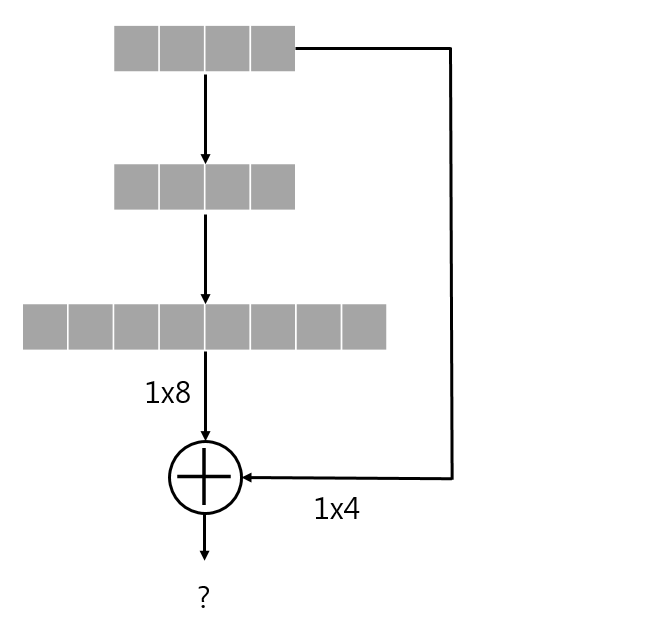

위의 그림은 shortcut응 이용해 출력과 2-layer전의 입력의 dimension이 달라서 더하기가 불가능합니다.

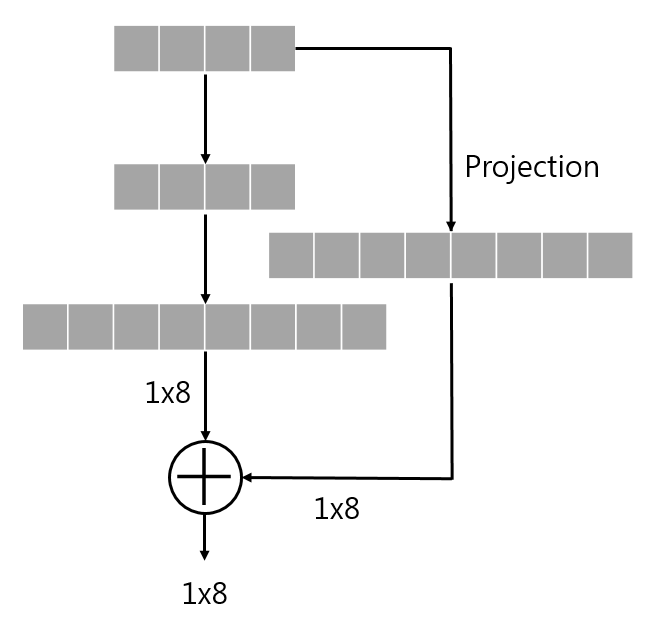

허나 projection을 통해서 해결이 가능합니다.


### Network Architectures

이 논문은 다양한 plain/residual network를 테스트 하고 현상을 관찰했습니다.

#### plain network

VGG net영감을 받았고, conv layer은 3X3 filter을 갖는다

동일한 output feature map size, layer는 동일 수의 filter 갖음

feature map size 절반, layer당 time complexity보전 위해 filter의 수 2배

Downsampling, stride =2인 conv layer사용

네트워크 마지막은 GAP , Softmax with 1000way FC layer

VGG보다 한참 적은 수의 filter와 낮은 complexity

#### Residual network

Residual network는 plain network + shortcut connection

identity shortcut는 input과 output가 동일한 dimension

만약 동일하지 않고 dimension차원이 증가한다면,

zero entry추가로 padding하여 dimension matching 후 identity mapping수행(파라미터 추가X)

y = F(x, {Wi}) + Wsx의 projection shortcut이용하여 dimension matching하기

shortcut connectino은 다른 크기의 feature map끼리 mapping되면, stride=2로 수행한다.

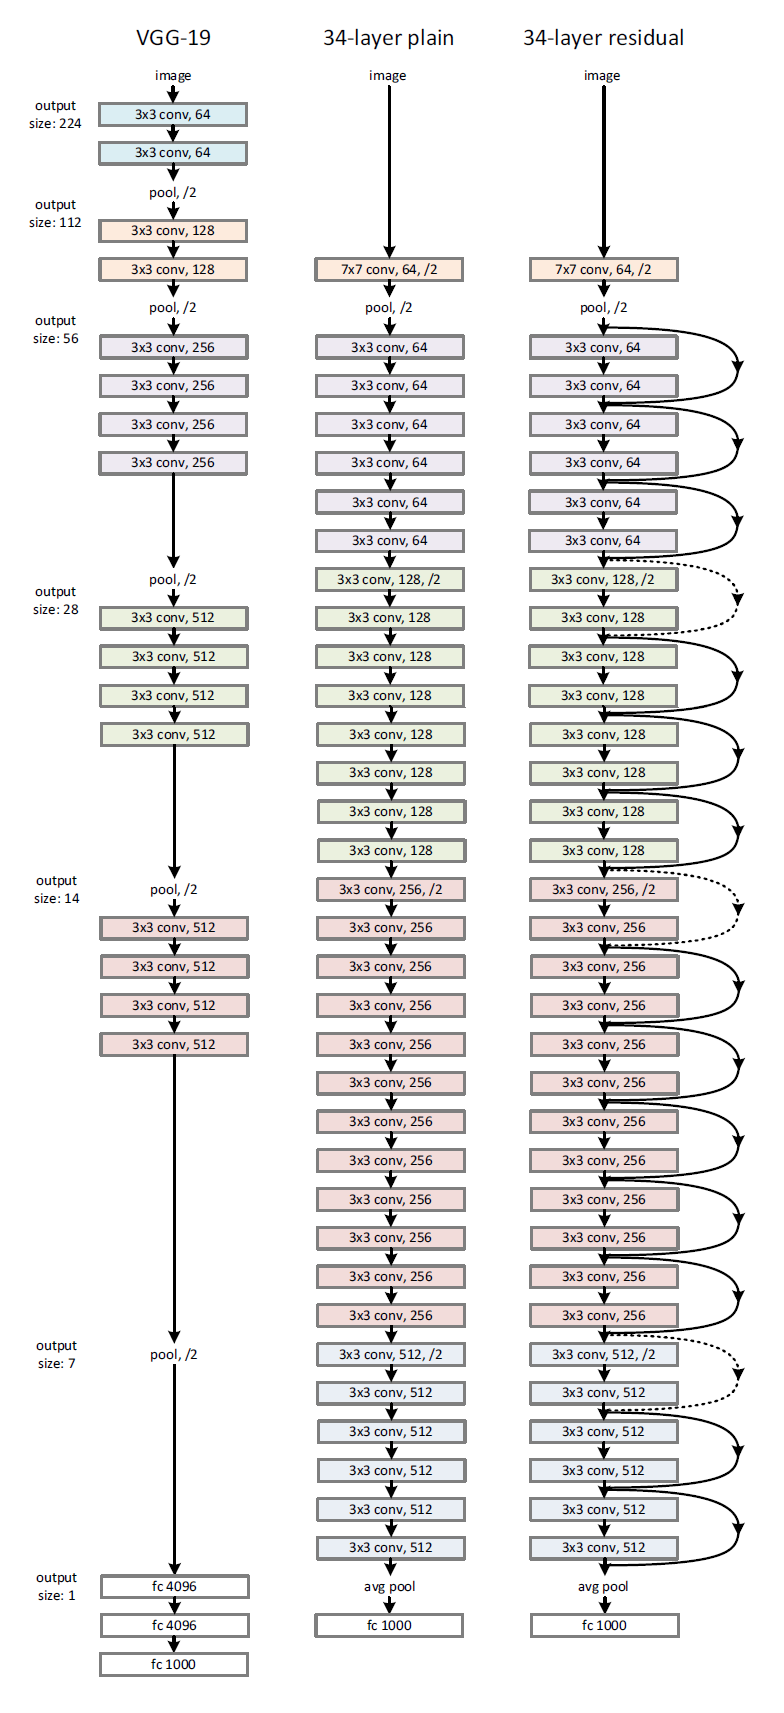

*점선은 dimension이 증가한 결과와 mapping하는 경우


#### Implementation

ImageNet Dataset실험은 AlexNet과 VGG방식 따른다

[256,480] 무작위하게 샘플링된 shorter side를 통해 rescaling로 이미지 scale augmentation한다

224X224 crop는 horizontal flip with per-pixel mean subtracted 이미지 중에서 무작위로 샘플링하여 standard color augmentation사용한다.


conv layer과 activation사이에 batch normalization사용하고 He initialization기법으로 가중치 초기화를 통해 plain과 residual networks학습

dropout사용하지 않음

learing rate = 0.1에서 시작하여 error plateau 상태마다 나누기 10을 하여, decay = 0.0001 & momentum=0.9인 SGD사용한다.

mini-batch size = 256, iteration = 600K

---

## Experiments

### ImageNet Classification

Class: 1K

training/validation/test = 1.28M/50K/100K

Test result = Top-1 error & Top-5 error

#### plain Networks

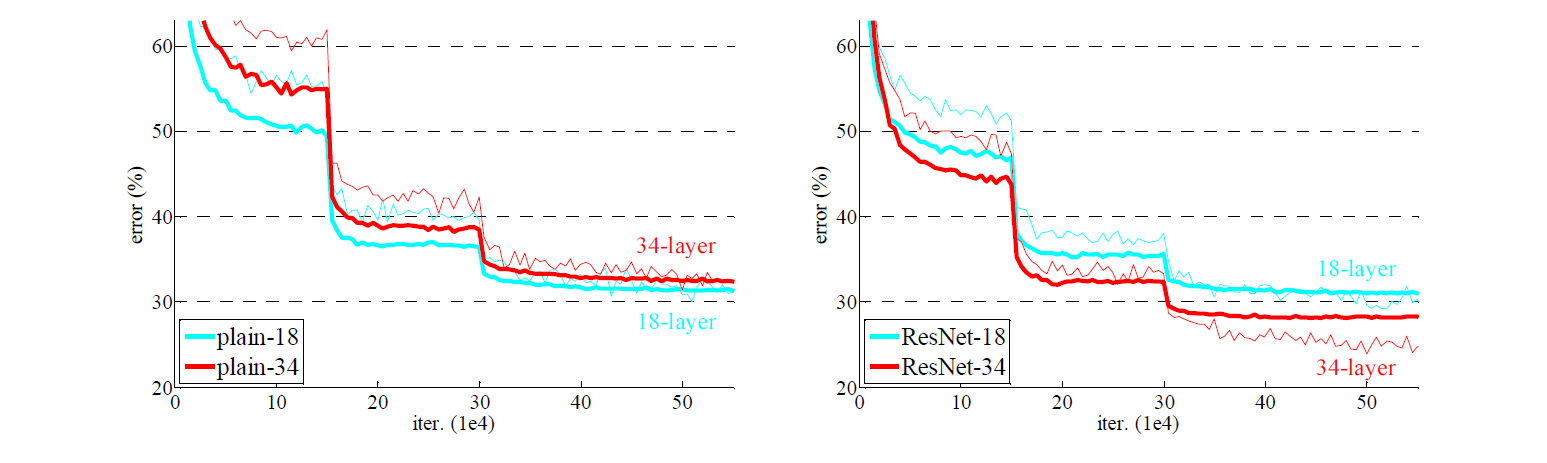

18-layer가 34-layer보다 학습과정 속에서 error가 더 낮게 나오는 성능 저하 문제를 관찰함. 이때, 저자들은 과적합을 원인으로 생각하지 않았습니다. 왜냐하면, 이 네트워크는 batch normalization으로 학습을 했기에 분산이 0이 될 수 없었고 healty norm도 보여서 vanishing gradients하지 않았다고 볼 수 있었기 때문이다.

#### Residual Networks

Baseline 아키텍처는 plain networks와 3X3 fiter pair + shortcut connection추가

모든 shortcut connection은 identity mapping사용

Dimension matching위해 zero padding사용

추가 파라미터 없음

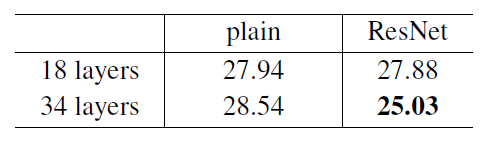

34-layer가 18-layer보다 우수한 성능을 보이고 training error가 상당히 낮으므로 성능 저하 문제 해결과 깊이가 깊어져도 좋은 accuracy얻고 수렴 속도 또한 빠르다.

#### Identity VS Projection Shortcuts

zero-padding shortcut는 dimension matching에 사용되고, 모든 shorcut는 파라미터에 자유롭다

projection shortcut는 dimension늘릴 때만 사용되고, 다른 shortcut는 모두 identity

모든 shortcut는 projection


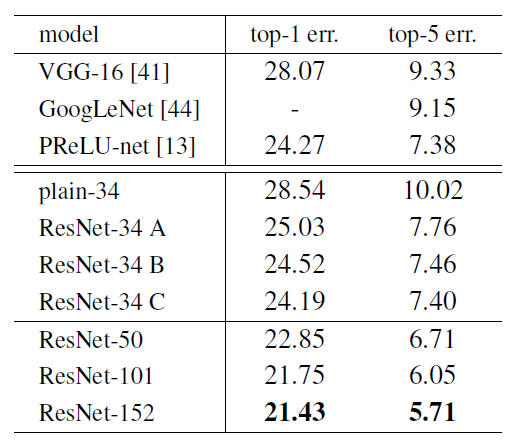


#### Deeper Bottleneck Architectures

ImageNet dataset위한 deeper Network를 설명해보겠습니다. 

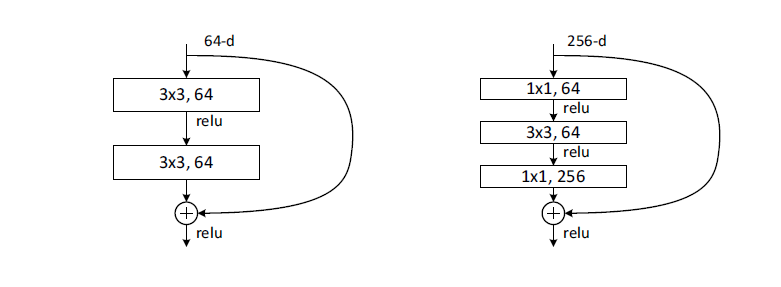

3개의 layer 순서대로 1X1, 3X3, 1X1 conv layer이고. 1X1은 dimension줄이거나 늘리는 용도이고 3X3 layer의 I/O의dimension줄인 bottleneck로 둔다. 이렇게 하면 차원이 크더라도 유사한 time complexity를 갖게 된다.

이 부분에서 identity shorcut가 중요한 부분이다. 왜냐하면, identity shortcut가 projection으로 대체 되면, 두 개의 high-dimensional로 출력이 연결되어 time complexity와 model size가 두 배로 늘어나기 때문이다. 고로, identity shortcut가 효율적인 모델을 만들어준다는 방증 또한 할 수 있다.


#### Comparisons with State-of- the-art Methods

34-layer ResNet은 previous best에 준하는 정학도 달성

152-layer Reset의 single model top 5 error:4.49%

서로 다른 깊이의 ResNet 6개 앙상블한 top 5 error:3.57%

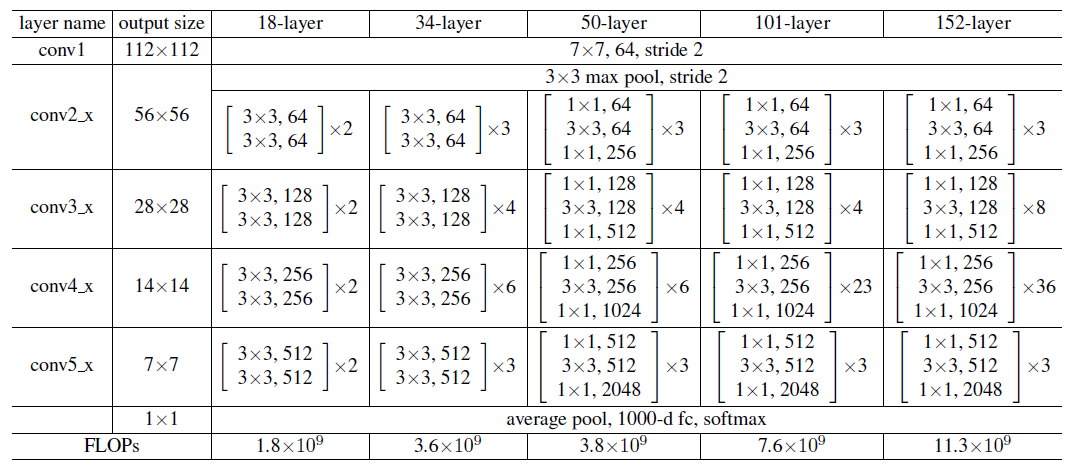

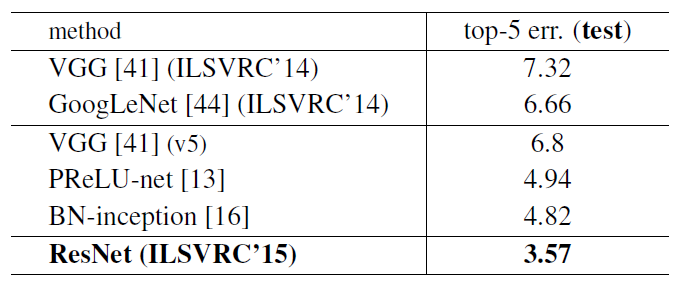


### CIFAR 10 and Analysis

논문에서 CIFAR 10 dataset을 가지고 연구 수행을 많이 했는데 training set학습과 test set에 대한 평가를 기준으로 하였고, extremely deep network초점으로 하였기에 여러 가중치 레이어로 구성된 아키텍처를 사용했다

input: per pixel mean subtracted 32X32 이미지

1layer : 3X3 conv layer

크기가 각각 {32,16,8}인 특성 맵에 3X3 conv적용된 6n개의 layer stack 사용하였고 각 size마다 2n개의 layer구성

filter의 수는  {16,32,64}

sumsampling는 strides =2인 conv layer

FC layer = global average pooling & softmax

shortcut connection은 identity shortcut로, 구조상 차이 빼고는 모든 조건이 plain network와 동일

학습 진행 방법

4개의 pixel의 각 측면에 padding, padded image와 horizontal flip중에서 무작위로 32x32 crop샘플링

He initialization으로 weight 초기화

decay = 0.0001, momentum = 0.9

learning rate =0.1, 32000/480000번 째 iteration에서 rate를 10으로 나누어 적용

2개의 GPU에서 mini_batch_size = 128, 64000번 학습

성능 테스트 시 32 X 32의 원본 이미지에 대한 single view만 평가

실제 실험에서는 n = {3, 5, 7, 9}에 대한 20/32/44/56-layer network를 비교한다

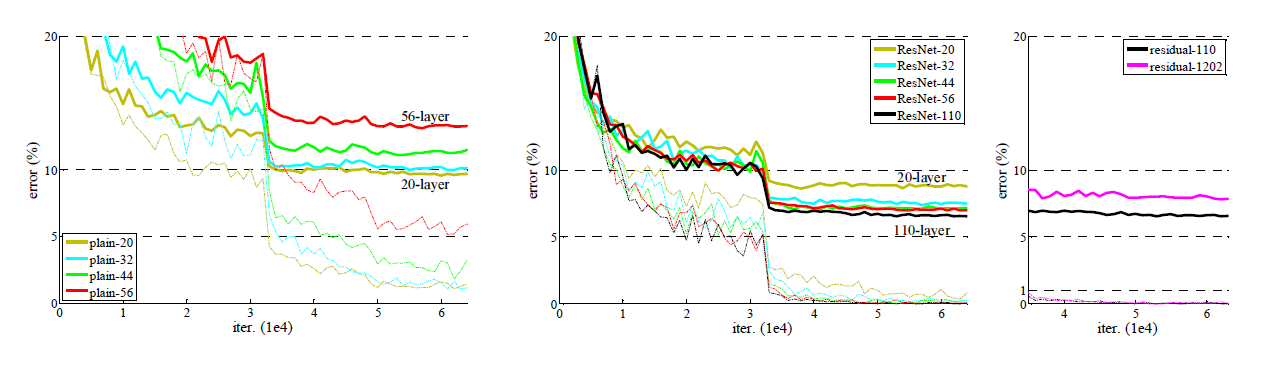


#### Analysis of Layer  Responses

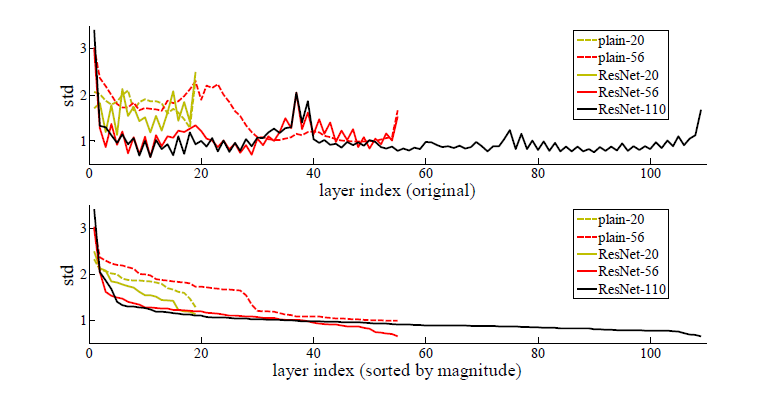

layer response의 std를 나타낸 것으로 reponse는 batch normalization과 nonlinearity(ReLU/addition)사이에서의 3x3 conv layer의 결과값이다

ResNet에서는 residual fucntion의 response강도가 드러남으로, 대응하는 plain network보다 작은 reponse보여주고 깊이가 깊을 수록 더 작아지는 것을 알 수 있다.




## 코드 실습

실제로 논문의 내용이 맞는지에 대해서 점검을 했습니다. 논문이 유독 CIFAR10관련 해서 작성을 많이 했기에 CIFAR10 그리고 갠적으로 궁금한 MNIST를 했습니다. 나중에 좀 더 공부해서 사전학습된 ResNet데이터 사용해서 해볼 겁니다.

### ResNet 18 모델 정의 및 인스턴스 초기화

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim
import os


# ResNet18을 위해 최대한 간단히 수정한 BasicBlock 클래스 정의
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()

        # 3x3 필터를 사용 (너비와 높이를 줄일 때는 stride 값 조절)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        # 3x3 필터를 사용 (패딩을 1만큼 주기 때문에 너비와 높이가 동일)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        self.shortcut = nn.Sequential() # identity인 경우
        if stride != 1: # stride가 1이 아니라면, Identity mapping이 아닌 경우
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x) # (핵심) skip connection
        out = F.relu(out)
        return out


# ResNet 클래스 정의
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # 64개의 3x3 필터(filter)를 사용
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes # 다음 레이어를 위해 채널 수 변경
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


# ResNet18 함수 정의
def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

### MNIST 데이터셋 다운로드 및 부르기

In [6]:
import torchvision
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=4)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### 환경 설정 및 훈련함수 정의

In [7]:
device = 'cuda'

net = ResNet18()
net = net.to(device)
net = torch.nn.DataParallel(net)
cudnn.benchmark = True

learning_rate = 0.01
file_name = 'resnet18_mnist.pt'

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)


def train(epoch):
    print('\n[ Train epoch: %d ]' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()

        benign_outputs = net(inputs)
        loss = criterion(benign_outputs, targets)
        loss.backward()

        optimizer.step()
        train_loss += loss.item()
        _, predicted = benign_outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
        if batch_idx % 100 == 0:
            print('\nCurrent batch:', str(batch_idx))
            print('Current benign train accuracy:', str(predicted.eq(targets).sum().item() / targets.size(0)))
            print('Current benign train loss:', loss.item())

    print('\nTotal benign train accuarcy:', 100. * correct / total)
    print('Total benign train loss:', train_loss)


def test(epoch):
    print('\n[ Test epoch: %d ]' % epoch)
    net.eval()
    loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(test_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        total += targets.size(0)

        outputs = net(inputs)
        loss += criterion(outputs, targets).item()

        _, predicted = outputs.max(1)
        correct += predicted.eq(targets).sum().item()

    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', loss / total)

    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print('Model Saved!')


def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 5:
        lr /= 10
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

### 학습 진행

간단하게 10번 정도 하겠습니다.

정확성은 99.5%입니다.

In [8]:
for epoch in range(0, 10):
    adjust_learning_rate(optimizer, epoch)
    train(epoch)
    test(epoch)


[ Train epoch: 0 ]

Current batch: 0
Current benign train accuracy: 0.1015625
Current benign train loss: 2.4499855041503906

Current batch: 100
Current benign train accuracy: 0.9921875
Current benign train loss: 0.05179402977228165

Current batch: 200
Current benign train accuracy: 0.96875
Current benign train loss: 0.04103776812553406

Current batch: 300
Current benign train accuracy: 0.9921875
Current benign train loss: 0.02356775477528572

Current batch: 400
Current benign train accuracy: 0.9921875
Current benign train loss: 0.038364749401807785

Total benign train accuarcy: 96.115
Total benign train loss: 58.79420884652063

[ Test epoch: 0 ]

Test accuarcy: 99.07
Test average loss: 0.00030608445339894386
Model Saved!

[ Train epoch: 1 ]

Current batch: 0
Current benign train accuracy: 1.0
Current benign train loss: 0.0161898173391819

Current batch: 100
Current benign train accuracy: 0.9921875
Current benign train loss: 0.03290000557899475

Current batch: 200
Current benign train 

### CIFAR10 데이터셋 다운로드 및 부르기

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim
import os


# ResNet18을 위해 최대한 간단히 수정한 BasicBlock 클래스 정의
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()

        # 3x3 필터를 사용 (너비와 높이를 줄일 때는 stride 값 조절)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        # 3x3 필터를 사용 (패딩을 1만큼 주기 때문에 너비와 높이가 동일)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes) # 배치 정규화(batch normalization)

        self.shortcut = nn.Sequential() # identity인 경우
        if stride != 1: # stride가 1이 아니라면, Identity mapping이 아닌 경우
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x) # (핵심) skip connection
        out = F.relu(out)
        return out


# ResNet 클래스 정의
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # 64개의 3x3 필터(filter)를 사용
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes # 다음 레이어를 위해 채널 수 변경
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


# ResNet18 함수 정의
def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

In [17]:
import torchvision
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


### 환경 설정 및 학습 함수 정의

In [18]:
device = 'cuda'

net = ResNet18()
net = net.to(device)
net = torch.nn.DataParallel(net)
cudnn.benchmark = True

learning_rate = 0.1
file_name = 'resnet18_cifar10.pt'

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)


def train(epoch):
    print('\n[ Train epoch: %d ]' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()

        benign_outputs = net(inputs)
        loss = criterion(benign_outputs, targets)
        loss.backward()

        optimizer.step()
        train_loss += loss.item()
        _, predicted = benign_outputs.max(1)

        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
        if batch_idx % 100 == 0:
            print('\nCurrent batch:', str(batch_idx))
            print('Current benign train accuracy:', str(predicted.eq(targets).sum().item() / targets.size(0)))
            print('Current benign train loss:', loss.item())

    print('\nTotal benign train accuarcy:', 100. * correct / total)
    print('Total benign train loss:', train_loss)


def test(epoch):
    print('\n[ Test epoch: %d ]' % epoch)
    net.eval()
    loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(test_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        total += targets.size(0)

        outputs = net(inputs)
        loss += criterion(outputs, targets).item()

        _, predicted = outputs.max(1)
        correct += predicted.eq(targets).sum().item()

    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', loss / total)

    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print('Model Saved!')


def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 100:
        lr /= 10
    if epoch >= 150:
        lr /= 10
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

### 학습 진행

20번 정도 하겠습니다.

17번째 가장 좋은 85.53%나오고 그 이후에는 overfitting이 된 것 같습니다.

In [19]:
for epoch in range(0, 20):
    adjust_learning_rate(optimizer, epoch)
    train(epoch)
    test(epoch)


[ Train epoch: 0 ]

Current batch: 0
Current benign train accuracy: 0.1328125
Current benign train loss: 2.3609724044799805

Current batch: 100
Current benign train accuracy: 0.2265625
Current benign train loss: 2.0249321460723877

Current batch: 200
Current benign train accuracy: 0.375
Current benign train loss: 1.7823967933654785

Current batch: 300
Current benign train accuracy: 0.421875
Current benign train loss: 1.6257017850875854

Total benign train accuarcy: 32.62
Total benign train loss: 726.0996830463409

[ Test epoch: 0 ]

Test accuarcy: 43.0
Test average loss: 0.015164174509048462
Model Saved!

[ Train epoch: 1 ]

Current batch: 0
Current benign train accuracy: 0.4609375
Current benign train loss: 1.4604846239089966

Current batch: 100
Current benign train accuracy: 0.4375
Current benign train loss: 1.418994665145874

Current batch: 200
Current benign train accuracy: 0.4765625
Current benign train loss: 1.4380837678909302

Current batch: 300
Current benign train accuracy: 0